In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import spacy

In [2]:
df_train=pd.read_csv('/content/twitter_training.csv')
df_val=pd.read_csv('/content/twitter_training.csv')

In [3]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df_train['Positive'].value_counts()

,count
Positive,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


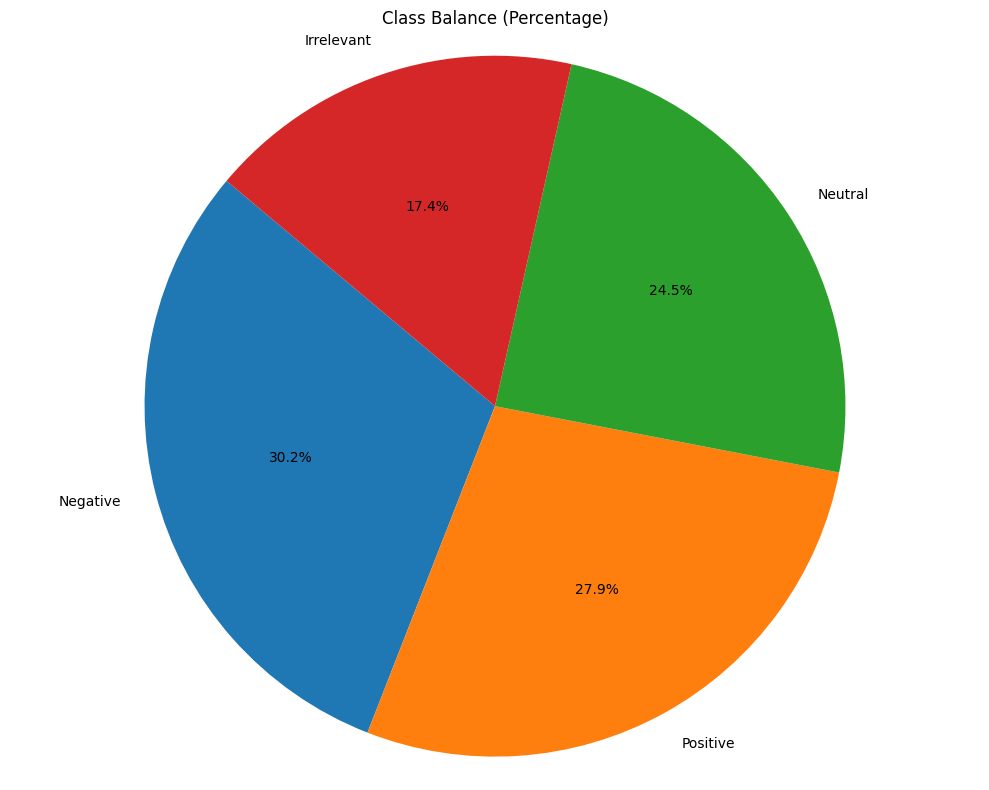

In [5]:
class_counts = df_train['Positive'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

total_images = len(df_train)

class_counts['Percentage'] = (class_counts['Count'] / total_images) * 100

class_counts = class_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(class_counts['Percentage'], labels=class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Class Balance (Percentage)')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [6]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    if pd.isnull(text):
        return ""
    # Tokenize the text and remove stop words and punctuation
    doc = nlp(text)
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(filtered_tokens)

In [8]:
le = LabelEncoder()
df_train['Positive'] = le.fit_transform(df_train['Positive'])
df_train=df_train.drop(['Borderlands','2401'],axis=1)
df_train

,Positive,text
0,3,I am coming to the borders and I will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...
...,...,...
74676,3,Just realized that the Windows partition of my...
74677,3,Just realized that my Mac window partition is ...
74678,3,Just realized the windows partition of my Mac ...
74679,3,Just realized between the windows partition of...


In [10]:
df_val.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [11]:
df_val.rename(columns={"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "text"}, inplace=True)

In [12]:
df_val

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [21]:
le = LabelEncoder()
df_train['Positive'] = le.fit_transform(df_train['Positive'])

In [30]:
df_val.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [32]:
df_val.rename(columns={"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "text"}, inplace=True)

In [33]:
df_val

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [37]:
df_val.rename(columns={"Irrelevant": "Positive"}, inplace=True)
combined_df = pd.concat([df_train, df_val], ignore_index=True)
combined_df

,Positive,text,2401,Borderlands,"im getting on borderlands and i will murder you all ,"
0,3,come border kill,NaN,NaN,NaN
1,3,m get borderland kill,NaN,NaN,NaN
2,3,m come borderland murder,NaN,NaN,NaN
3,3,m get borderland 2 murder,NaN,NaN,NaN
4,3,m get borderland murder,NaN,NaN,NaN
...,...,...,...,...,...
149357,Positive,NaN,9200.0,Nvidia,Just realized that the Windows partition of my...
149358,Positive,NaN,9200.0,Nvidia,Just realized that my Mac window partition is ...
149359,Positive,NaN,9200.0,Nvidia,Just realized the windows partition of my Mac ...
149360,Positive,NaN,9200.0,Nvidia,Just realized between the windows partition of...
